In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [173]:
data = pd.read_csv("11.23.csv",index_col = 0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [188]:
data

,gameId,createDate,teamId,summonerId,isUnknownSummoner,participantId,championId,result,skinIndex,spell1,...,isRanked,perk0,perkPrimaryStyle,perkSubStyle,opScore,opScoreRank,isOPScoreMaxInTeam,gameLength,version,champion
0,5570909941,2021-11-17 00:00:52,100,1547812,0,4,222,WIN,0,7,...,1,8008,8000,8100,5.34,8,0,2910,11.22.406.3587,Jinx
90,5570989854,2021-11-17 00:00:21,100,1541661,0,4,222,WIN,0,7,...,1,8008,8000,8100,8.00,1,1,2596,11.22.406.3587,Jinx
217,5571020596,2021-11-17 00:01:13,200,83097529,0,9,222,WIN,0,7,...,1,8008,8000,8100,5.06,8,0,2727,11.22.406.3587,Jinx
247,5571021360,2021-11-17 00:01:06,100,85905956,0,4,222,WIN,0,4,...,1,8008,8000,8100,6.74,3,0,2492,11.22.406.3587,Jinx
344,5571022461,2021-11-17 00:01:43,200,22742730,0,9,222,LOSE,0,7,...,1,8008,8000,8100,4.99,10,0,2171,11.22.406.3587,Jinx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199805,5577310185,2021-11-19 23:47:35,200,83561255,0,8,136,WIN,0,12,...,1,8112,8100,8300,6.38,5,0,2097,11.23.409.111,AurelionSol
5202497,5577312969,2021-11-19 23:51:29,200,86248393,0,8,136,WIN,0,4,...,1,8112,8100,8300,7.27,3,0,1589,11.23.409.111,AurelionSol
5209588,5577330888,2021-11-19 23:49:46,200,83202040,0,8,136,LOSE,0,14,...,1,8112,8100,8300,6.62,4,1,1890,11.23.409.111,AurelionSol
5215216,5577342661,2021-11-19 23:41:09,100,47830381,0,3,136,WIN,0,14,...,1,8112,8100,8300,7.47,1,1,896,11.23.409.111,AurelionSol


In [175]:
data.columns

Index(['gameId', 'createDate', 'teamId', 'summonerId', 'isUnknownSummoner',
       'participantId', 'championId', 'result', 'skinIndex', 'spell1',
       'spell2', 'leaver', 'experienceEarned', 'eligibleFirstWinOfDay',
       'ipEarned', 'boostXpEarned', 'boostIpEarned', 'premadeSize', 'item0',
       'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'level',
       'championsKilled', 'numDeaths', 'assists', 'neutralMinionsKilled',
       'turretsKilled', 'barracksKilled', 'minionsKilled', 'largestMultiKill',
       'largestCriticalStrike', 'largestKillingSpree', 'goldEarned',
       'physicalDamageDealtToChampions', 'magicDamageDealtPlayer',
       'physicalDamageTaken', 'sightWardsBoughtInGame',
       'visionWardsBoughtInGame', 'wardKilled', 'wardPlaced', 'totalHeal',
       'totalDamageDealtToChampions', 'totalDamageDealt', 'totalDamageTaken',
       'neutralMinionsKilledEnemyJungle', 'neutralMinionsKilledTeamJungle',
       'visionScore', 'timeCCingOthers', 'damageSelfMitigate

In [176]:
# 챔피언 이름 추가
import requests
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/'+champ_ver+'/data/ko_KR/champion.json'
request = requests.get(championJsonURL)
champion_data=request.json()
champion_data.keys()
champion_dict = {}
for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
champion_dict.keys()
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])
data = pd.merge(data, champion, 
                     left_on = 'championId',right_index = True)

In [177]:
data['tierRank'].count()

5110262

In [178]:
# tierRank 항목의 빈칸 확인
data['tierRank'].isnull().sum()

106358

In [179]:
# tierRank 항목의 빈칸 제거
data.dropna(subset=['tierRank'], inplace=True)

In [180]:
data['tierRank'].isnull().sum()

0

In [181]:
# 승패가 unknown인 경우 제거
data = data[data['result'] != 'UNKNOWN']

In [182]:
data['tierRank'].value_counts()

G40       184485
S40       105185
P40        91484
G30        40021
S30        36083
           ...  
R1903          1
C11179         1
R1373          1
R1424          1
M1623          1
Name: tierRank, Length: 3919, dtype: int64

In [13]:
# data[data['tierRank'].str.contains('I')] = 'Iron'
# data[data['tierRank'].str.contains('B')] = 'Bronze'
# data[data['tierRank'].str.contains('S')] = 'Silver'
# data[data['tierRank'].str.contains('G')] = 'Gold' 
# data[data['tierRank'].str.contains('P')] = 'Platium'
# data[data['tierRank'].str.contains('D')] = 'Diamond'
# data[data['tierRank'].str.contains('M')] = 'Master'
# data[data['tierRank'].str.contains('G')] = 'Grandmaster'
# data[data['tierRank'].str.contains('C')] = 'Challenger'

In [183]:
# 티어별 분류
data_Iron = data[data['tierRank'].str.contains('I')]
data_Bronze = data[data['tierRank'].str.contains('B')]
data_Silver = data[data['tierRank'].str.contains('S')]
data_Gold =data[data['tierRank'].str.contains('G')]
data_Platinum = data[data['tierRank'].str.contains('P')]
data_Diamond = data[data['tierRank'].str.contains('D')]
data_Master = data[data['tierRank'].str.contains('M')]
data_Grandmaster = data[data['tierRank'].str.contains('R')]
data_Challenger = data[data['tierRank'].str.contains('C')]

In [184]:
len(data_Iron), len(data_Bronze), len(data_Silver), len(data_Gold), len(data_Platinum), len(data_Diamond), len(data_Master), len(data_Grandmaster), len(data_Challenger)

(54392, 664083, 1749375, 1776109, 658328, 133088, 22205, 5519, 2051)

Iron 티어 구하기

In [185]:
Iron_total = data_Iron.groupby("champion", as_index = False).size()

In [186]:
len(data_Iron)

54392

In [187]:
Iron_total

,champion,size
0,Aatrox,313
1,Ahri,242
2,Akali,1066
3,Akshan,198
4,Alistar,172
...,...,...
152,Zed,842
153,Ziggs,218
154,Zilean,44
155,Zoe,150


In [19]:
Iron_total['PickRate'] = (Iron_total['size']/len(data_Iron))*100

In [20]:
Iron_total

,champion,size,PickRate
0,Aatrox,313,0.575452
1,Ahri,242,0.444918
2,Akali,1066,1.959847
3,Akshan,198,0.364024
4,Alistar,172,0.316223
...,...,...,...
152,Zed,842,1.548022
153,Ziggs,218,0.400794
154,Zilean,44,0.080894
155,Zoe,150,0.275776


In [21]:
Iron_total = Iron_total.sort_values(by=['PickRate'], ascending=False)

In [22]:
Iron_total

,champion,size,PickRate
74,MasterYi,1645,3.024342
147,Yasuo,1586,2.915870
70,Lux,1519,2.792690
107,Sett,1443,2.652964
75,MissFortune,1400,2.573908
...,...,...,...
154,Zilean,44,0.080894
96,RekSai,37,0.068025
97,Rell,32,0.058832
20,Corki,21,0.038609


In [23]:
data_Iron['position'].value_counts()

J    12602
S    10927
T    10870
M    10812
A     9181
Name: position, dtype: int64

In [24]:
Iron_num = data_Iron['position'].value_counts()

In [25]:
Iron_num[0]

12602

In [26]:
Iron_Sup = data_Iron[data_Iron['position'] == 'S']
Iron_Top = data_Iron[data_Iron['position'] == 'T']
Iron_Jug = data_Iron[data_Iron['position'] == 'J']
Iron_Mid = data_Iron[data_Iron['position'] == 'M']
Iron_AD = data_Iron[data_Iron['position'] == 'A']

In [155]:
Iron_Sup

,champion,size,PickRate,position
146,Yuumi,1187,10.863000,S
67,Lux,1171,10.716574,S
88,Pyke,671,6.140752,S
13,Blitzcrank,655,5.994326,S
75,Morgana,613,5.609957,S
...,...,...,...,...
58,Kled,1,0.009152,S
107,Shyvana,1,0.009152,S
110,Sivir,1,0.009152,S
111,Skarner,1,0.009152,S


In [156]:
Iron_Top['position'] = 'T'
Iron_Jug['position'] = 'J'
Iron_Mid['position'] = 'M'
Iron_AD['position'] = 'A'

In [170]:
Iron_total = pd.concat([Iron_Top, Iron_Jug, Iron_Mid, Iron_AD, Iron_Sup])

In [171]:
Iron_total

,champion,size,PickRate,position
102,Sett,1123,10.331187,T
20,Darius,679,6.246550,T
33,Garen,470,4.323827,T
118,Teemo,442,4.066237,T
69,Malphite,420,3.863845,T
...,...,...,...,...
58,Kled,1,0.009152,S
107,Shyvana,1,0.009152,S
110,Sivir,1,0.009152,S
111,Skarner,1,0.009152,S


In [27]:
Iron_Sup = Iron_Sup.groupby("champion", as_index = False).size()
Iron_Top = Iron_Top.groupby("champion", as_index = False).size()
Iron_Jug = Iron_Jug.groupby("champion", as_index = False).size()
Iron_Mid = Iron_Mid.groupby("champion", as_index = False).size()
Iron_AD = Iron_AD.groupby("champion", as_index = False).size()

In [28]:
Iron_Sup['PickRate'] = (Iron_Sup['size']/Iron_num['S'])*100
Iron_Top['PickRate'] = (Iron_Top['size']/Iron_num['T'])*100
Iron_Jug['PickRate'] = (Iron_Jug['size']/Iron_num['J'])*100
Iron_Mid['PickRate'] = (Iron_Mid['size']/Iron_num['M'])*100
Iron_AD['PickRate'] = (Iron_AD['size']/Iron_num['A'])*100

In [29]:
Iron_Sup = Iron_Sup.sort_values(by=['PickRate'], ascending=False)
Iron_Top = Iron_Top.sort_values(by=['PickRate'], ascending=False)
Iron_Jug = Iron_Jug.sort_values(by=['PickRate'], ascending=False)
Iron_Mid = Iron_Mid.sort_values(by=['PickRate'], ascending=False)
Iron_AD = Iron_AD.sort_values(by=['PickRate'], ascending=False)

Bronze 티어 구하기

In [30]:
Bronze_total = data_Bronze.groupby("champion", as_index = False).size()

In [31]:
len(data_Bronze)

664083

In [32]:
Bronze_total['PickRate'] = (Bronze_total['size']/len(data_Bronze))*100

In [33]:
Bronze_total = Bronze_total.sort_values(by=['PickRate'], ascending=False)

In [34]:
Bronze_total

,champion,size,PickRate
70,Lux,21708,3.268868
28,Ezreal,18647,2.807932
147,Yasuo,16801,2.529955
74,MasterYi,16563,2.494116
75,MissFortune,16380,2.466559
...,...,...,...
12,Bard,384,0.057824
10,AurelionSol,326,0.049090
20,Corki,308,0.046380
43,Ivern,305,0.045928


In [35]:
data_Bronze['position'].value_counts()

S    141377
J    132711
T    131587
M    129688
A    128720
Name: position, dtype: int64

In [36]:
bronze_num = data_Bronze['position'].value_counts()

In [37]:
Bronze_Sup = data_Bronze[data_Bronze['position'] == 'S']
Bronze_Top = data_Bronze[data_Bronze['position'] == 'T']
Bronze_Jug = data_Bronze[data_Bronze['position'] == 'J']
Bronze_Mid = data_Bronze[data_Bronze['position'] == 'M']
Bronze_AD = data_Bronze[data_Bronze['position'] == 'A']

In [38]:
Bronze_Sup = Bronze_Sup.groupby("champion", as_index = False).size()
Bronze_Top = Bronze_Top.groupby("champion", as_index = False).size()
Bronze_Jug = Bronze_Jug.groupby("champion", as_index = False).size()
Bronze_Mid = Bronze_Mid.groupby("champion", as_index = False).size()
Bronze_AD = Bronze_AD.groupby("champion", as_index = False).size()

In [39]:
Bronze_Sup['PickRate'] = (Bronze_Sup['size']/bronze_num['S'])*100
Bronze_Top['PickRate'] = (Bronze_Top['size']/bronze_num['T'])*100
Bronze_Jug['PickRate'] = (Bronze_Jug['size']/bronze_num['J'])*100
Bronze_Mid['PickRate'] = (Bronze_Mid['size']/bronze_num['M'])*100
Bronze_AD['PickRate'] = (Bronze_AD['size']/bronze_num['A'])*100

In [40]:
Bronze_Sup = Bronze_Sup.sort_values(by=['PickRate'], ascending=False)
Bronze_Top = Bronze_Top.sort_values(by=['PickRate'], ascending=False)
Bronze_Jug = Bronze_Jug.sort_values(by=['PickRate'], ascending=False)
Bronze_Mid = Bronze_Mid.sort_values(by=['PickRate'], ascending=False)
Bronze_AD = Bronze_AD.sort_values(by=['PickRate'], ascending=False)

In [41]:
Bronze_Sup

,champion,size,PickRate
70,Lux,17009,12.030953
150,Yuumi,9128,6.456496
13,Blitzcrank,8766,6.200443
78,Morgana,8525,6.029977
91,Pyke,7635,5.400454
...,...,...,...
110,Shyvana,7,0.004951
86,Olaf,6,0.004244
26,Elise,6,0.004244
39,Hecarim,6,0.004244


In [42]:
# 픽률이 1% 이상인 챔피언만
Bronze_Sup_c = Bronze_Sup[Bronze_Sup['PickRate'] >= 1]

<BarContainer object of 27 artists>

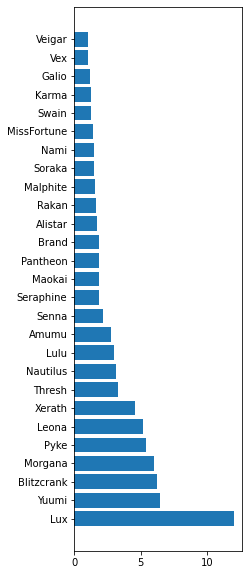

In [43]:
fig, ax = plt.subplots(figsize = (3,10))
ax.barh(Bronze_Sup_c['champion'], 
        Bronze_Sup_c['PickRate'])

Silver 티어 구하기

In [44]:
Silver_total = data_Silver.groupby("champion", as_index = False).size()

In [45]:
len(data_Silver)

1749375

In [46]:
Silver_total['PickRate'] = (Silver_total['size']/len(data_Silver))*100

In [47]:
Silver_total = Silver_total.sort_values(by=['PickRate'], ascending=False)

In [48]:
Silver_total

,champion,size,PickRate
28,Ezreal,51411,2.938821
70,Lux,47361,2.707310
16,Caitlyn,41250,2.357985
48,Jhin,41014,2.344494
134,Vayne,36890,2.108753
...,...,...,...
20,Corki,1286,0.073512
123,Taric,1171,0.066938
10,AurelionSol,946,0.054076
43,Ivern,758,0.043330


In [49]:
data_Silver['position'].value_counts()

T    352458
M    352316
A    349935
S    349310
J    345356
Name: position, dtype: int64

In [50]:
Silver_num = data_Silver['position'].value_counts()

In [51]:
Silver_Sup = data_Silver[data_Silver['position'] == 'S']
Silver_Top = data_Silver[data_Silver['position'] == 'T']
Silver_Jug = data_Silver[data_Silver['position'] == 'J']
Silver_Mid = data_Silver[data_Silver['position'] == 'M']
Silver_AD = data_Silver[data_Silver['position'] == 'A']

In [52]:
Silver_Sup = Silver_Sup.groupby("champion", as_index = False).size()
Silver_Top = Silver_Top.groupby("champion", as_index = False).size()
Silver_Jug = Silver_Jug.groupby("champion", as_index = False).size()
Silver_Mid = Silver_Mid.groupby("champion", as_index = False).size()
Silver_AD = Silver_AD.groupby("champion", as_index = False).size()

In [53]:
Silver_Sup['PickRate'] = (Silver_Sup['size']/Silver_num['S'])*100
Silver_Top['PickRate'] = (Silver_Top['size']/Silver_num['T'])*100
Silver_Jug['PickRate'] = (Silver_Jug['size']/Silver_num['J'])*100
Silver_Mid['PickRate'] = (Silver_Mid['size']/Silver_num['M'])*100
Silver_AD['PickRate'] = (Silver_AD['size']/Silver_num['A'])*100

In [54]:
Silver_Sup = Silver_Sup.sort_values(by=['PickRate'], ascending=False)
Silver_Top = Silver_Top.sort_values(by=['PickRate'], ascending=False)
Silver_Jug = Silver_Jug.sort_values(by=['PickRate'], ascending=False)
Silver_Mid = Silver_Mid.sort_values(by=['PickRate'], ascending=False)
Silver_AD = Silver_AD.sort_values(by=['PickRate'], ascending=False)

In [55]:
Silver_AD

,champion,size,PickRate
27,Ezreal,47712,13.634532
47,Jhin,40059,11.447555
16,Caitlyn,38660,11.047766
74,MissFortune,26924,7.694000
48,Jinx,25772,7.364796
...,...,...,...
15,Braum,2,0.000572
111,Skarner,2,0.000572
94,RekSai,2,0.000572
64,Leona,1,0.000286


Gold 티어 구하기

In [56]:
Gold_total = data_Gold.groupby("champion", as_index = False).size()

In [57]:
len(data_Gold)

1776109

In [58]:
Gold_total['PickRate'] = (Gold_total['size']/len(data_Gold))*100

In [59]:
Gold_total = Gold_total.sort_values(by=['PickRate'], ascending=False)

In [60]:
Gold_total

,champion,size,PickRate
48,Jhin,51533,2.901455
28,Ezreal,50574,2.847460
16,Caitlyn,43474,2.447710
64,LeeSin,43349,2.440672
37,Graves,41100,2.314047
...,...,...,...
20,Corki,1691,0.095208
123,Taric,1257,0.070773
114,Skarner,1042,0.058668
10,AurelionSol,937,0.052756


In [61]:
data_Gold['position'].value_counts()

A    358993
J    356599
M    355797
T    355480
S    349240
Name: position, dtype: int64

In [62]:
Gold_num = data_Gold['position'].value_counts()

In [63]:
Gold_Sup = data_Gold[data_Gold['position'] == 'S']
Gold_Top = data_Gold[data_Gold['position'] == 'T']
Gold_Jug = data_Gold[data_Gold['position'] == 'J']
Gold_Mid = data_Gold[data_Gold['position'] == 'M']
Gold_AD = data_Gold[data_Gold['position'] == 'A']

In [64]:
Gold_Sup = Gold_Sup.groupby("champion", as_index = False).size()
Gold_Top = Gold_Top.groupby("champion", as_index = False).size()
Gold_Jug = Gold_Jug.groupby("champion", as_index = False).size()
Gold_Mid = Gold_Mid.groupby("champion", as_index = False).size()
Gold_AD = Gold_AD.groupby("champion", as_index = False).size()

In [65]:
Gold_Sup['PickRate'] = (Gold_Sup['size']/Gold_num['S'])*100
Gold_Top['PickRate'] = (Gold_Top['size']/Gold_num['T'])*100
Gold_Jug['PickRate'] = (Gold_Jug['size']/Gold_num['J'])*100
Gold_Mid['PickRate'] = (Gold_Mid['size']/Gold_num['M'])*100
Gold_AD['PickRate'] = (Gold_AD['size']/Gold_num['A'])*100

In [66]:
Gold_Sup = Gold_Sup.sort_values(by=['PickRate'], ascending=False)
Gold_Top = Gold_Top.sort_values(by=['PickRate'], ascending=False)
Gold_Jug = Gold_Jug.sort_values(by=['PickRate'], ascending=False)
Gold_Mid = Gold_Mid.sort_values(by=['PickRate'], ascending=False)
Gold_AD = Gold_AD.sort_values(by=['PickRate'], ascending=False)

In [67]:
Gold_Sup

,champion,size,PickRate
70,Lux,29571,8.467243
145,Xerath,22646,6.484366
125,Thresh,22071,6.319723
13,Blitzcrank,22010,6.302256
150,Yuumi,18124,5.189554
...,...,...,...
20,Corki,13,0.003722
51,Kalista,13,0.003722
59,Khazix,10,0.002863
24,Draven,9,0.002577


Platinum 티어 구하기

In [68]:
Platinum_total = data_Platinum.groupby("champion", as_index = False).size()

In [69]:
len(data_Platinum)

658328

In [70]:
Platinum_total['PickRate'] = (Platinum_total['size']/len(data_Platinum))*100

In [71]:
Platinum_total = Platinum_total.sort_values(by=['PickRate'], ascending=False)

In [72]:
Platinum_total

,champion,size,PickRate
48,Jhin,20872,3.170456
64,LeeSin,18450,2.802554
28,Ezreal,17489,2.656578
37,Graves,15485,2.352171
16,Caitlyn,15016,2.280930
...,...,...,...
86,Olaf,674,0.102381
20,Corki,582,0.088406
114,Skarner,573,0.087039
10,AurelionSol,477,0.072456


In [73]:
data_Platinum['position'].value_counts()

J    133749
A    133630
M    132997
T    131519
S    126433
Name: position, dtype: int64

In [74]:
Platinum_num = data_Platinum['position'].value_counts()

In [75]:
Platinum_Sup = data_Platinum[data_Platinum['position'] == 'S']
Platinum_Top = data_Platinum[data_Platinum['position'] == 'T']
Platinum_Jug = data_Platinum[data_Platinum['position'] == 'J']
Platinum_Mid = data_Platinum[data_Platinum['position'] == 'M']
Platinum_AD = data_Platinum[data_Platinum['position'] == 'A']

In [76]:
Platinum_Sup = Platinum_Sup.groupby("champion", as_index = False).size()
Platinum_Top = Platinum_Top.groupby("champion", as_index = False).size()
Platinum_Jug = Platinum_Jug.groupby("champion", as_index = False).size()
Platinum_Mid = Platinum_Mid.groupby("champion", as_index = False).size()
Platinum_AD = Platinum_AD.groupby("champion", as_index = False).size()

In [77]:
Platinum_Sup['PickRate'] = (Platinum_Sup['size']/Platinum_num['S'])*100
Platinum_Top['PickRate'] = (Platinum_Top['size']/Platinum_num['T'])*100
Platinum_Jug['PickRate'] = (Platinum_Jug['size']/Platinum_num['J'])*100
Platinum_Mid['PickRate'] = (Platinum_Mid['size']/Platinum_num['M'])*100
Platinum_AD['PickRate'] = (Platinum_AD['size']/Platinum_num['A'])*100

In [78]:
Platinum_Sup = Platinum_Sup.sort_values(by=['PickRate'], ascending=False)
Platinum_Top = Platinum_Top.sort_values(by=['PickRate'], ascending=False)
Platinum_Jug = Platinum_Jug.sort_values(by=['PickRate'], ascending=False)
Platinum_Mid = Platinum_Mid.sort_values(by=['PickRate'], ascending=False)
Platinum_AD = Platinum_AD.sort_values(by=['PickRate'], ascending=False)

In [79]:
Platinum_AD

,champion,size,PickRate
45,Jhin,20662,15.462097
26,Ezreal,16812,12.581007
14,Caitlyn,14717,11.013246
46,Jinx,11210,8.388835
64,Lucian,10277,7.690638
...,...,...,...
124,Udyr,1,0.000748
85,Poppy,1,0.000748
89,Rakan,1,0.000748
91,RekSai,1,0.000748


Diamond 티어 구하기

In [80]:
Diamond_total = data_Diamond.groupby("champion", as_index = False).size()

In [81]:
len(data_Diamond)

133088

In [82]:
Diamond_total['PickRate'] = (Diamond_total['size']/len(data_Diamond))*100

In [83]:
Diamond_total = Diamond_total.sort_values(by=['PickRate'], ascending=False)

In [84]:
Diamond_total

,champion,size,PickRate
48,Jhin,4357,3.273774
64,LeeSin,3687,2.770347
49,Jinx,3076,2.311253
37,Graves,3008,2.260159
28,Ezreal,2769,2.080578
...,...,...,...
20,Corki,122,0.091669
43,Ivern,122,0.091669
149,Yorick,91,0.068376
41,Illaoi,74,0.055602


In [85]:
data_Diamond['position'].value_counts()

A    26952
S    26941
J    26558
M    26413
T    26224
Name: position, dtype: int64

In [86]:
Diamond_num = data_Diamond['position'].value_counts()

In [87]:
Diamond_Sup = data_Diamond[data_Diamond['position'] == 'S']
Diamond_Top = data_Diamond[data_Diamond['position'] == 'T']
Diamond_Jug = data_Diamond[data_Diamond['position'] == 'J']
Diamond_Mid = data_Diamond[data_Diamond['position'] == 'M']
Diamond_AD = data_Diamond[data_Diamond['position'] == 'A']

In [88]:
Diamond_Sup = Diamond_Sup.groupby("champion", as_index = False).size()
Diamond_Top = Diamond_Top.groupby("champion", as_index = False).size()
Diamond_Jug = Diamond_Jug.groupby("champion", as_index = False).size()
Diamond_Mid = Diamond_Mid.groupby("champion", as_index = False).size()
Diamond_AD = Diamond_AD.groupby("champion", as_index = False).size()

In [89]:
Diamond_Sup['PickRate'] = (Diamond_Sup['size']/Diamond_num['S'])*100
Diamond_Top['PickRate'] = (Diamond_Top['size']/Diamond_num['T'])*100
Diamond_Jug['PickRate'] = (Diamond_Jug['size']/Diamond_num['J'])*100
Diamond_Mid['PickRate'] = (Diamond_Mid['size']/Diamond_num['M'])*100
Diamond_AD['PickRate'] = (Diamond_AD['size']/Diamond_num['A'])*100

In [90]:
Diamond_Sup = Diamond_Sup.sort_values(by=['PickRate'], ascending=False)
Diamond_Top = Diamond_Top.sort_values(by=['PickRate'], ascending=False)
Diamond_Jug = Diamond_Jug.sort_values(by=['PickRate'], ascending=False)
Diamond_Mid = Diamond_Mid.sort_values(by=['PickRate'], ascending=False)
Diamond_AD = Diamond_AD.sort_values(by=['PickRate'], ascending=False)

In [91]:
Diamond_AD

,champion,size,PickRate
39,Jhin,4327,16.054467
40,Jinx,3050,11.316414
22,Ezreal,2710,10.054912
12,Caitlyn,2697,10.006679
6,Aphelios,2056,7.628376
...,...,...,...
48,Kennen,1,0.003710
94,TahmKench,1,0.003710
36,JarvanIV,1,0.003710
70,Nunu,1,0.003710


Master 티어 구하기

In [92]:
Master_total = data_Master.groupby("champion", as_index = False).size()

In [93]:
len(data_Master)

22205

In [94]:
Master_total['PickRate'] = (Master_total['size']/len(data_Master))*100

In [95]:
Master_total = Master_total.sort_values(by=['PickRate'], ascending=False)

In [96]:
Master_total

,champion,size,PickRate
48,Jhin,776,3.494708
64,LeeSin,626,2.819185
37,Graves,590,2.657059
125,Thresh,579,2.607521
49,Jinx,577,2.598514
...,...,...,...
41,Illaoi,8,0.036028
56,Kayle,7,0.031524
114,Skarner,7,0.031524
149,Yorick,7,0.031524


In [97]:
data_Master['position'].value_counts()

S    4706
A    4506
T    4375
M    4352
J    4266
Name: position, dtype: int64

In [98]:
Master_num = data_Master['position'].value_counts()

In [99]:
Master_Sup = data_Master[data_Master['position'] == 'S']
Master_Top = data_Master[data_Master['position'] == 'T']
Master_Jug = data_Master[data_Master['position'] == 'J']
Master_Mid = data_Master[data_Master['position'] == 'M']
Master_AD = data_Master[data_Master['position'] == 'A']

In [100]:
Master_Sup = Master_Sup.groupby("champion", as_index = False).size()
Master_Top = Master_Top.groupby("champion", as_index = False).size()
Master_Jug = Master_Jug.groupby("champion", as_index = False).size()
Master_Mid = Master_Mid.groupby("champion", as_index = False).size()
Master_AD = Master_AD.groupby("champion", as_index = False).size()

In [101]:
Master_Sup['PickRate'] = (Master_Sup['size']/Master_num['S'])*100
Master_Top['PickRate'] = (Master_Top['size']/Master_num['T'])*100
Master_Jug['PickRate'] = (Master_Jug['size']/Master_num['J'])*100
Master_Mid['PickRate'] = (Master_Mid['size']/Master_num['M'])*100
Master_AD['PickRate'] = (Master_AD['size']/Master_num['A'])*100

In [102]:
Master_Sup = Master_Sup.sort_values(by=['PickRate'], ascending=False)
Master_Top = Master_Top.sort_values(by=['PickRate'], ascending=False)
Master_Jug = Master_Jug.sort_values(by=['PickRate'], ascending=False)
Master_Mid = Master_Mid.sort_values(by=['PickRate'], ascending=False)
Master_AD = Master_AD.sort_values(by=['PickRate'], ascending=False)

In [103]:
Master_AD

,champion,size,PickRate
20,Jhin,772,17.132712
21,Jinx,573,12.716378
3,Aphelios,506,11.229472
12,Ezreal,370,8.211274
7,Caitlyn,337,7.478917
...,...,...,...
51,TwistedFate,1,0.022193
50,Tryndamere,1,0.022193
26,Kennen,1,0.022193
48,Taliyah,1,0.022193


Grandmaster 티어 구하기

In [104]:
Grandmaster_total = data_Grandmaster.groupby("champion", as_index = False).size()

In [105]:
len(data_Grandmaster)

1776109

In [106]:
Grandmaster_total['PickRate'] = (Grandmaster_total['size']/len(data_Grandmaster))*100

In [107]:
Grandmaster_total = Grandmaster_total.sort_values(by=['PickRate'], ascending=False)

In [108]:
Grandmaster_total

,champion,size,PickRate
48,Jhin,51533,2.901455
28,Ezreal,50574,2.847460
16,Caitlyn,43474,2.447710
64,LeeSin,43349,2.440672
37,Graves,41100,2.314047
...,...,...,...
20,Corki,1691,0.095208
123,Taric,1257,0.070773
114,Skarner,1042,0.058668
10,AurelionSol,937,0.052756


In [109]:
data_Grandmaster['position'].value_counts()

A    358993
J    356599
M    355797
T    355480
S    349240
Name: position, dtype: int64

In [110]:
Grandmaster_num = data_Grandmaster['position'].value_counts()

In [111]:
Grandmaster_Sup = data_Grandmaster[data_Grandmaster['position'] == 'S']
Grandmaster_Top = data_Grandmaster[data_Grandmaster['position'] == 'T']
Grandmaster_Jug = data_Grandmaster[data_Grandmaster['position'] == 'J']
Grandmaster_Mid = data_Grandmaster[data_Grandmaster['position'] == 'M']
Grandmaster_AD = data_Grandmaster[data_Grandmaster['position'] == 'A']

In [112]:
Grandmaster_Sup = Grandmaster_Sup.groupby("champion", as_index = False).size()
Grandmaster_Top = Grandmaster_Top.groupby("champion", as_index = False).size()
Grandmaster_Jug = Grandmaster_Jug.groupby("champion", as_index = False).size()
Grandmaster_Mid = Grandmaster_Mid.groupby("champion", as_index = False).size()
Grandmaster_AD = Grandmaster_AD.groupby("champion", as_index = False).size()

In [113]:
Grandmaster_Sup['PickRate'] = (Grandmaster_Sup['size']/Grandmaster_num['S'])*100
Grandmaster_Top['PickRate'] = (Grandmaster_Top['size']/Grandmaster_num['T'])*100
Grandmaster_Jug['PickRate'] = (Grandmaster_Jug['size']/Grandmaster_num['J'])*100
Grandmaster_Mid['PickRate'] = (Grandmaster_Mid['size']/Grandmaster_num['M'])*100
Grandmaster_AD['PickRate'] = (Grandmaster_AD['size']/Grandmaster_num['A'])*100

In [114]:
Grandmaster_Sup = Grandmaster_Sup.sort_values(by=['PickRate'], ascending=False)
Grandmaster_Top = Grandmaster_Top.sort_values(by=['PickRate'], ascending=False)
Grandmaster_Jug = Grandmaster_Jug.sort_values(by=['PickRate'], ascending=False)
Grandmaster_Mid = Grandmaster_Mid.sort_values(by=['PickRate'], ascending=False)
Grandmaster_AD = Grandmaster_AD.sort_values(by=['PickRate'], ascending=False)

In [152]:
Grandmaster_AD['PickRate'].sum()

100.00000000000001

Challenger 티어 구하기

In [116]:
Challenger_total = data_Challenger.groupby("champion", as_index = False).size()

In [117]:
len(data_Challenger)

2051

In [118]:
Challenger_total['PickRate'] = (Challenger_total['size']/len(data_Challenger))*100

In [119]:
Challenger_total = Challenger_total.sort_values(by=['PickRate'], ascending=False)

In [120]:
Challenger_total

,champion,size,PickRate
36,Jinx,89,4.339347
28,Graves,80,3.900536
49,LeeSin,76,3.705510
6,Aphelios,63,3.071672
34,Jayce,59,2.876646
...,...,...,...
16,Darius,1,0.048757
107,Veigar,1,0.048757
90,Shyvana,1,0.048757
105,Varus,1,0.048757


In [121]:
data_Challenger['position'].value_counts()

J    437
T    422
A    414
M    409
S    369
Name: position, dtype: int64

In [122]:
Challenger_num = data_Challenger['position'].value_counts()

In [123]:
Challenger_Sup = data_Challenger[data_Challenger['position'] == 'S']
Challenger_Top = data_Challenger[data_Challenger['position'] == 'T']
Challenger_Jug = data_Challenger[data_Challenger['position'] == 'J']
Challenger_Mid = data_Challenger[data_Challenger['position'] == 'M']
Challenger_AD = data_Challenger[data_Challenger['position'] == 'A']

In [124]:
Challenger_Sup = Challenger_Sup.groupby("champion", as_index = False).size()
Challenger_Top = Challenger_Top.groupby("champion", as_index = False).size()
Challenger_Jug = Challenger_Jug.groupby("champion", as_index = False).size()
Challenger_Mid = Challenger_Mid.groupby("champion", as_index = False).size()
Challenger_AD = Challenger_AD.groupby("champion", as_index = False).size()

In [125]:
Challenger_Sup['PickRate'] = (Challenger_Sup['size']/Challenger_num['S'])*100
Challenger_Top['PickRate'] = (Challenger_Top['size']/Challenger_num['T'])*100
Challenger_Jug['PickRate'] = (Challenger_Jug['size']/Challenger_num['J'])*100
Challenger_Mid['PickRate'] = (Challenger_Mid['size']/Challenger_num['M'])*100
Challenger_AD['PickRate'] = (Challenger_AD['size']/Challenger_num['A'])*100

In [126]:
Challenger_Sup = Challenger_Sup.sort_values(by=['PickRate'], ascending=False)
Challenger_Top = Challenger_Top.sort_values(by=['PickRate'], ascending=False)
Challenger_Jug = Challenger_Jug.sort_values(by=['PickRate'], ascending=False)
Challenger_Mid = Challenger_Mid.sort_values(by=['PickRate'], ascending=False)
Challenger_AD = Challenger_AD.sort_values(by=['PickRate'], ascending=False)

In [127]:
Challenger_Sup

,champion,size,PickRate
25,Thresh,55,14.905149
10,Lulu,41,11.111111
17,Rakan,41,11.111111
9,Leona,31,8.401084
11,Lux,30,8.130081
8,Karma,24,6.504065
16,Pyke,20,5.420054
13,Nami,14,3.794038
6,Galio,14,3.794038
5,Braum,13,3.523035


전체 데이터

In [128]:
data

,gameId,createDate,teamId,summonerId,isUnknownSummoner,participantId,championId,result,skinIndex,spell1,...,isRanked,perk0,perkPrimaryStyle,perkSubStyle,opScore,opScoreRank,isOPScoreMaxInTeam,gameLength,version,champion
0,5570909941,2021-11-17 00:00:52,100,1547812,0,4,222,WIN,0,7,...,1,8008,8000,8100,5.34,8,0,2910,11.22.406.3587,Jinx
90,5570989854,2021-11-17 00:00:21,100,1541661,0,4,222,WIN,0,7,...,1,8008,8000,8100,8.00,1,1,2596,11.22.406.3587,Jinx
217,5571020596,2021-11-17 00:01:13,200,83097529,0,9,222,WIN,0,7,...,1,8008,8000,8100,5.06,8,0,2727,11.22.406.3587,Jinx
247,5571021360,2021-11-17 00:01:06,100,85905956,0,4,222,WIN,0,4,...,1,8008,8000,8100,6.74,3,0,2492,11.22.406.3587,Jinx
344,5571022461,2021-11-17 00:01:43,200,22742730,0,9,222,LOSE,0,7,...,1,8008,8000,8100,4.99,10,0,2171,11.22.406.3587,Jinx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199805,5577310185,2021-11-19 23:47:35,200,83561255,0,8,136,WIN,0,12,...,1,8112,8100,8300,6.38,5,0,2097,11.23.409.111,AurelionSol
5202497,5577312969,2021-11-19 23:51:29,200,86248393,0,8,136,WIN,0,4,...,1,8112,8100,8300,7.27,3,0,1589,11.23.409.111,AurelionSol
5209588,5577330888,2021-11-19 23:49:46,200,83202040,0,8,136,LOSE,0,14,...,1,8112,8100,8300,6.62,4,1,1890,11.23.409.111,AurelionSol
5215216,5577342661,2021-11-19 23:41:09,100,47830381,0,3,136,WIN,0,14,...,1,8112,8100,8300,7.47,1,1,896,11.23.409.111,AurelionSol


In [129]:
Total = data.groupby("champion", as_index = False).size()

In [130]:
Total['PickRate'] = (Total['size']/len(data))*100

In [131]:
Total = Total.sort_values(by=['PickRate'], ascending=False)

In [132]:
Total

,champion,size,PickRate
28,Ezreal,142618,2.815672
48,Jhin,130545,2.577318
70,Lux,124059,2.449266
16,Caitlyn,117344,2.316693
64,LeeSin,112879,2.228542
...,...,...,...
20,Corki,4027,0.079504
123,Taric,3953,0.078043
10,AurelionSol,2956,0.058360
114,Skarner,2785,0.054984


In [133]:
data['position'].value_counts()

T    1014021
M    1013872
A    1013460
J    1013325
S    1010472
Name: position, dtype: int64

In [134]:
num = data['position'].value_counts()

In [135]:
Sup = data[data['position'] == 'S']
Top = data[data['position'] == 'T']
Jug = data[data['position'] == 'J']
Mid = data[data['position'] == 'M']
AD = data[data['position'] == 'A']

In [136]:
Sup = Sup.groupby("champion", as_index = False).size()
Top = Top.groupby("champion", as_index = False).size()
Jug = Jug.groupby("champion", as_index = False).size()
Mid = Mid.groupby("champion", as_index = False).size()
AD = AD.groupby("champion", as_index = False).size()

In [137]:
Sup['PickRate'] = (Sup['size']/num['S'])*100
Top['PickRate'] = (Top['size']/num['T'])*100
Jug['PickRate'] = (Jug['size']/num['J'])*100
Mid['PickRate'] = (Mid['size']/num['M'])*100
AD['PickRate'] = (AD['size']/num['A'])*100

In [138]:
Sup = Sup.sort_values(by=['PickRate'], ascending=False)
Top = Top.sort_values(by=['PickRate'], ascending=False)
Jug = Jug.sort_values(by=['PickRate'], ascending=False)
Mid = Mid.sort_values(by=['PickRate'], ascending=False)
AD = AD.sort_values(by=['PickRate'], ascending=False)

In [144]:
AD

,champion,size,PickRate
28,Ezreal,133972,13.219269
48,Jhin,128202,12.649932
16,Caitlyn,111545,11.006354
49,Jinx,76914,7.589249
68,Lucian,71101,7.015669
...,...,...,...
26,Elise,9,0.000888
94,Rakan,9,0.000888
113,Skarner,6,0.000592
27,Evelynn,3,0.000296


<AxesSubplot:xlabel='PickRate', ylabel='champion'>

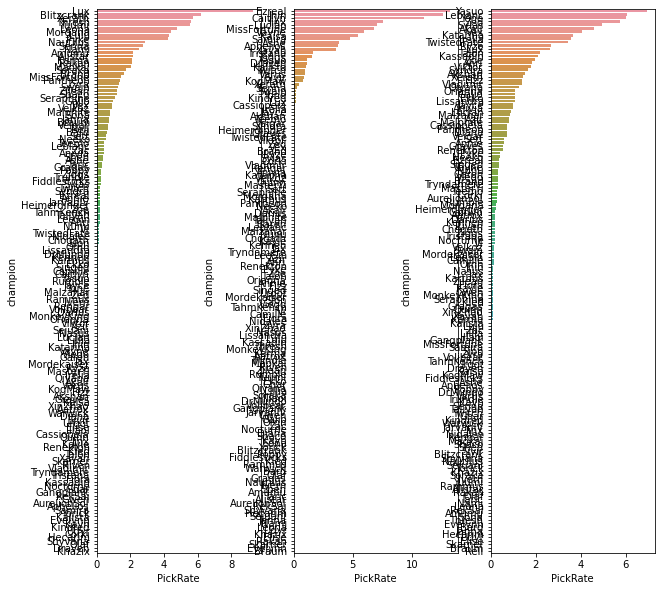

In [140]:
fig, ax = plt.subplots(figsize = (10,10))
plt.subplot(131)
sns.barplot(data = Sup, y = 'champion', 
            x = 'PickRate')
plt.subplot(1,3,2)
sns.barplot(data = AD, y = 'champion', 
            x = 'PickRate')
plt.subplot(133)
sns.barplot(data = Mid, y = 'champion', 
            x = 'PickRate')


In [151]:
Challenger_AD.head(10)

,champion,size,PickRate
7,Jinx,89,21.497585
0,Aphelios,62,14.975845
6,Jhin,47,11.352657
2,Caitlyn,40,9.661836
13,Lucian,25,6.038647
5,Ezreal,22,5.314010
20,Xayah,14,3.381643
14,MissFortune,14,3.381643
22,Ziggs,14,3.381643
4,Draven,14,3.381643


In [ ]:
# 시각화


fig, axes = plt.subplots(nrows=5
                         , ncols=1
                         , sharex=True
                         , figsize=(10,15))

position = ['T', 'M', 'A', 'S', 'J']

for i, ax in enumerate(axes):
    DIAMOND_group_i = DIAMOND_group[IRON_group['position'] == position[i]]
    DIAMOND_group_i = DIAMOND_group_i[0:21]
    ax.barh(DIAMOND_group_i['name'], DIAMOND_group_i['winRate'], color='blue', alpha=0.5)

plt.tight_layout()